# Machine Learning For Health Take Home Problem

## Background

Clinical imaging data are rich sources of information about human health and disease risk. One of the types of data that we work with frequently is electrocardiography (ECG). ECGs are used by cardiologists to measure various intervals such as heart rate and to detect arrhythmias such as atrial fibrillation. With deep learning modeling approaches, we and others have provided evidence that ECGs contain information relevant to many diseases and phenotypes.

In this take home problem, you will work through several stages of a clinical modeling experiment. First, you will demonstrate your ability to characterize and manipulate real world ECG data. In the second part, you will have the opportunity to experiment with model training and evaluation. For all tasks, there is no single right answer. What we are most interested in your thought process including how you explore a data set and consider modeling strategies. To help us understand your thought process please keep in mind the following:

- efficiency, style, and readability of code are all important
- formatted text can be added to the notebook in addition to code
- figures should be easy to interpret

## Part 1: Data Exploration

In this first part you will work with a large data set of 12-lead ECG signals along with corresponding metadata. The data that you will download (see below) are a subset of __[these](https://physionet.org/content/ecg-arrhythmia/1.0.0/)__ data which you can learn more about by following the link. You will need more than 2 GB of storage available. Once you have downloaded the data (see below), please complete the following tasks:

1. Write a function called `load_ecgs` that takes two arguments: `ecg_dir` and `batch_size`. This function should return an iterator of tuples, where each tuple represents a batch of ECG signals, ages, and sexes (encoded as 0 or 1). Each tuple should be of length 3 where each element of the tuple is a list of length `batch_size`; the first element is a list of numpy arrays representing ECG signals with shape (12, 5000) (note the order of the dimensions) and the second and third elements of each tuple are lists of ints representing ages and sexes, respectively.

2. Write another function called `batch_stats` that takes three arguments: `ecg_dir`, `num_batches` and `batch_size`. This function should return a pandas dataframe with `num_batches` rows and 2 columns. The first column should contain the mean age in each batch and the second column should contain the proportion of each batch that is Female. This function should use the function `load_ecgs` defined for the first task.

3. Produce a dataframe by calling `batch_stats(ecg_dir, 100, 100)`. Produce two plots that show the distributions of ages and sexes.

Feel free to define additional helper functions. The __[wfdb](https://wfdb.readthedocs.io/en/latest/index.html)__ library is strongly recommended for reading the ECG files. In both Parts 1 and 2 you are welcome to use any built-in or common Python library (e.g. libraries that can be installed via pip or conda).

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import wfdb
import gdown
from zipfile import ZipFile
import seaborn as sns
from sklearn.feature_selection import f_classif


In [ ]:
!pip install sweetviz xgboost seaborn keras scikit-learn

In [4]:
gid = '16EXxW4KtOFvhMX3gRiK8SviQUOL5Xda4'
gdown.download(id=gid, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16EXxW4KtOFvhMX3gRiK8SviQUOL5Xda4
To: C:\Users\Mannan Bhola\OneDrive\Desktop\ml4h-takehome-1.0\a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0-ml4h.zip
100%|███████████████████████████████████████████████████████████████████████████████| 683M/683M [00:17<00:00, 39.5MB/s]


'a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0-ml4h.zip'

In [240]:
cwd = os.getcwd()
ecg_dir = os.path.join(cwd, 'a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0-ml4h/WFDBRecords')
zip_file = os.path.join(cwd, 'a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0-ml4h.zip')
with ZipFile(zip_file, 'r') as zf:
    zf.extractall(cwd)

In [241]:
record = wfdb.rdrecord(os.path.join(ecg_dir, '01/011/JS00105'))

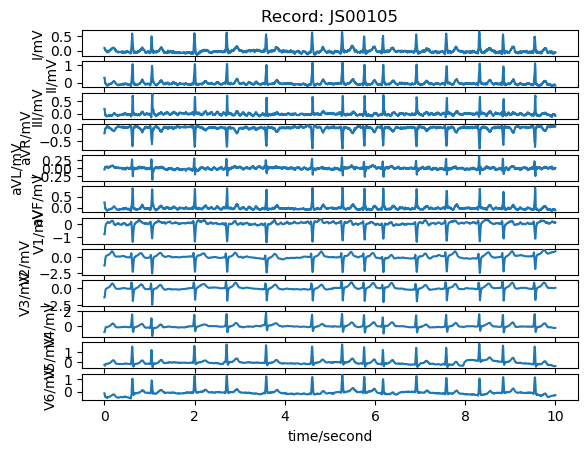

In [242]:
wfdb.plot_wfdb(record=record)

In [243]:
record.__dict__

{'record_name': 'JS00105',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 58',
  'Sex: Male',
  'Dx: 164889003',
  'Rx: Unknown',
  'Hx: Unknown',
  'Sx: Unknown'],
 'sig_name': ['I',
  'II',
  'III',
  'aVR',
  'aVL',
  'aVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[ 0.098,  0.283,  0.185, ..., -0.859, -0.273, -0.127],
        [ 0.098,  0.283,  0.185, ..., -0.859, -0.273, -0.127],
        [ 0.098,  0.283,  0.185, ..., -0.859, -0.273, -0.127],
        ...,
        [-0.059, -0.132, -0.073, ..., -0.298, -0.39 , -0.278],
        [-0.063, -0.132, -0.068, ..., -0.288, -0.39 , -0.268],
        [-0.063, -0.151, -0.088, ..., -0.288, -0.39 , -0.273]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS00105.mat',
  'JS

In [244]:
record.p_signal.shape # The ECG signal

(5000, 12)

In [245]:
ecg_dir
wfdb.rdrecord(os.path.join(ecg_dir, '01/011/JS00106'))

### Add your code and produce figures here:

In [246]:
# loadecgs funtion
def load_ecgs(ecg_dir, batch_size):
    record_paths = []
    level1 = os.listdir(ecg_dir)
    for l1 in level1:  # goes over different levels of directories and gets all the paths to get the specific data
        level2 = os.listdir(os.path.join(ecg_dir,l1))
        #print(level2)
        for l2 in level2:   # even with "os.walk"  time complexity would be same, this can also be implemented in a dfs fashion
            records =  open(os.path.join(ecg_dir,l1,l2,"RECORDS"), "r")
            samples = records.readlines()
            sample_names = [s.split("\n")[0] for s in samples]
            for s in sample_names:
                record_paths.append(os.path.join(ecg_dir,l1,l2,s))
                
    sex_dict = {"Male" : 0 , "Female" : 1} # dictionary to define one-hot encoding of Sex
   

    num_batches = (len(record_paths) + batch_size - 1) // batch_size  # number of batches based on batch_size and total records
    
    main_tuple= []
    for i in range(num_batches):  # get batches 
        temps = record_paths[i*batch_size:(i+1)*batch_size]
        sample_tuple = ()
        ages = []
        signals = []
        sexes= []
        for j,t in enumerate(temps): # get records per batch based on batch_size
            try: # I used a Try condition because there were 3 records (pair of .hea and .mat files that had some header issue)
                record = wfdb.rdrecord(t)
                signal = record.p_signal 
                signals.append(signal)
                age = int(record.comments[0].split("Age: ")[-1])
                #print(age)
                ages.append(age)
                sex = sex_dict[record.comments[1].split("Sex: ")[-1]]
                sexes.append(sex)
            except:
                continue

        sample_tuple = tuple((signals, ages, sexes))  # final tuple for this batch 

        main_tuple.append(sample_tuple)
    
      
            
    return iter(main_tuple)
            
# the above function can definately be made more optimal by reducing the extra space for storing the record_paths        


def batch_stats(ecg_dir, num_batches , batch_size):
    
    data = load_ecgs(ecg_dir, batch_size)
    data = list(data)
    total_batches = len(data)
    total_records = total_batches*batch_size
    if num_batches > (total_records + batch_size - 1) // batch_size :
        return "Please use smaller number of batches for which you want to get stats, as lesser number of batches are possible with the given batch size"
        sys.exit()
    stats_df = pd.DataFrame()
    
    mean_ages = np.zeros(num_batches)
    female_prop = np.zeros(num_batches)
    for i in range(num_batches):
        batch = data[i]
        mean_ages[i] = np.mean(batch[1])  # mean age of batch 
        female_prop[i] = np.sum(batch[2])/batch_size  # female proportion can be calculated this way since "1" represents female
        
    stats_df["mean_age"]  = mean_ages
    stats_df["female_proportion"] = female_prop
    
    return stats_df
        
        
        
        
        
    
    

In [247]:

df = batch_stats(ecg_dir , 100, 100) # run specificied function

In [248]:
df.columns

Index(['mean_age', 'female_proportion'], dtype='object')

Text(0.5, 1.0, 'Distribution of Female proportion')

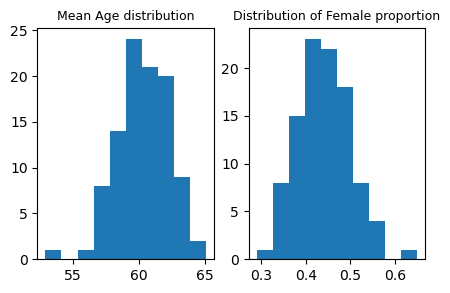

In [262]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].hist(df["mean_age"])
axes[0].set_title("Mean Age distribution",fontsize=9)
axes[1].hist(df["female_proportion"])
axes[1].set_title("Distribution of Female proportion",fontsize=9)

## Part 2: Modeling

In this part you will work through a common modeling exercise for the type of work that we do. We have provided you with representations of clinical objects embedded in a latent space. Your task is to train a model to predict the provided target(s). Again, getting the "right" answer is less important than showing us how you approach a modeling problem including data visualization and describing your modeling considerations. Feel free to use a machine learning framework like tensorflow, pytorch or sklearn to train and evaluate your model.  Think about what questions you might ask a clinical collaborator to ensure that your findings are clinically relevant. We also provide 5 phenotypes (which are biological features like weight, height or blood pressure) which contain various amounts of meta data. (As a bonus see if you can figure out what biological features the phenotypes correspond to)!

Below is some code to get you started loading and visualizing the data:

In [33]:
latent_df = pd.read_csv('latent_space_detective.tsv', sep='\t')
latent_df = latent_df.dropna(axis=1, how='all')


In [34]:
latent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 522 entries, sample_id to target_3
dtypes: float64(521), int64(1)
memory usage: 39.8 MB


In [35]:
latent_df[[c for c in latent_df if not 'latent_' in c]].head()


,sample_id,phenotype_0,phenotype_1,phenotype_2,phenotype_3,phenotype_4,target_0,target_1,target_2,target_3
0,0,61.0,27.2705,1.0,406.0,NaN,0.0,0.0,0.0,942.0
1,1,68.0,31.8261,0.0,394.0,NaN,0.0,0.0,0.0,942.0
2,2,64.0,23.3242,0.0,439.0,NaN,0.0,0.0,0.0,1200.0
3,3,65.0,24.0980,1.0,396.0,NaN,0.0,0.0,0.0,1174.0
4,4,67.0,29.0920,1.0,402.0,NaN,0.0,0.0,0.0,1026.0


In [36]:
latent_df

,sample_id,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,...,latent_511,phenotype_0,phenotype_1,phenotype_2,phenotype_3,phenotype_4,target_0,target_1,target_2,target_3
0,0,-0.132628,-1.141294,0.004973,0.541673,0.038877,0.059113,-0.015810,0.009977,-0.242396,...,0.152893,61.0,27.2705,1.0,406.0,NaN,0.0,0.0,0.0,942.0
1,1,-0.131067,-1.138333,0.011583,0.982735,0.040272,0.845716,-0.014397,-0.934590,0.505804,...,0.403913,68.0,31.8261,0.0,394.0,NaN,0.0,0.0,0.0,942.0
2,2,-0.139247,-1.153847,-0.001527,0.853517,0.032962,1.264644,-0.021798,0.318744,0.239756,...,-0.273485,64.0,23.3242,0.0,439.0,NaN,0.0,0.0,0.0,1200.0
3,3,-0.130809,-1.137844,0.006760,0.590121,0.040503,0.357974,-0.014164,0.432457,-0.799022,...,0.141037,65.0,24.0980,1.0,396.0,NaN,0.0,0.0,0.0,1174.0
4,4,-0.145213,-1.165159,-0.007386,0.206406,0.027631,-0.468326,-0.027195,0.261236,0.488526,...,0.310204,67.0,29.0920,1.0,402.0,NaN,0.0,0.0,0.0,1026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-0.134980,1.122755,0.002664,0.467241,0.036776,0.256674,-0.017937,0.015655,0.481602,...,0.092644,61.0,23.4720,0.0,434.0,NaN,0.0,0.0,0.0,962.0
9996,9996,-0.131804,2.759632,0.005782,0.068905,0.039613,0.161905,-0.015065,-0.453003,0.018031,...,0.125522,61.0,21.2891,0.0,440.0,NaN,0.0,0.0,0.0,852.0
9997,9997,-0.150160,-1.174541,-0.012244,0.694685,0.023210,-0.476351,-0.031672,1.222811,-0.353001,...,0.053966,62.0,23.9540,1.0,468.0,129.0,0.0,0.0,0.0,1210.0
9998,9998,-0.151461,-1.021403,-0.013522,0.947131,0.022048,0.858918,-0.032848,0.731010,-0.691340,...,0.186333,57.0,20.7037,0.0,415.0,NaN,0.0,0.0,0.0,1358.0


In [44]:
#latent_feats_phenotypes = latent_df[[c for c in latent_df if not ('target_') in c]]
latent_feats_phenotypes = latent_df.drop(["sample_id","phenotype_4"],1)
latent_feats_phenotypes.head()

C:\Users\Mannan Bhola\AppData\Local\Temp\ipykernel_15192\38438237.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  latent_feats_phenotypes = latent_df.drop(["sample_id","phenotype_4"],1)


,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_510,latent_511,phenotype_0,phenotype_1,phenotype_2,phenotype_3,target_0,target_1,target_2,target_3
0,-0.132628,-1.141294,0.004973,0.541673,0.038877,0.059113,-0.015810,0.009977,-0.242396,-0.751462,...,0.044339,0.152893,61.0,27.2705,1.0,406.0,0.0,0.0,0.0,942.0
1,-0.131067,-1.138333,0.011583,0.982735,0.040272,0.845716,-0.014397,-0.934590,0.505804,1.262846,...,-0.044069,0.403913,68.0,31.8261,0.0,394.0,0.0,0.0,0.0,942.0
2,-0.139247,-1.153847,-0.001527,0.853517,0.032962,1.264644,-0.021798,0.318744,0.239756,0.428434,...,-0.034925,-0.273485,64.0,23.3242,0.0,439.0,0.0,0.0,0.0,1200.0
3,-0.130809,-1.137844,0.006760,0.590121,0.040503,0.357974,-0.014164,0.432457,-0.799022,-0.629247,...,0.065244,0.141037,65.0,24.0980,1.0,396.0,0.0,0.0,0.0,1174.0
4,-0.145213,-1.165159,-0.007386,0.206406,0.027631,-0.468326,-0.027195,0.261236,0.488526,-0.105690,...,-0.039095,0.310204,67.0,29.0920,1.0,402.0,0.0,0.0,0.0,1026.0


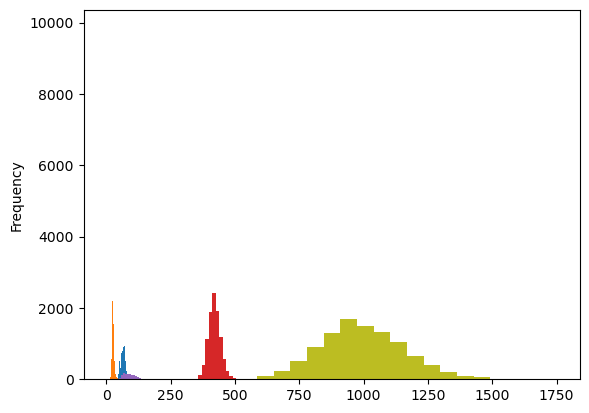

In [38]:
for c in latent_df:
    if 'latent' in c or 'sample' in c:
        continue
    latent_df[c].plot.hist(bins=20)

### Add your code and produce figures here:
We would like you to investigate these data and train (at least one) model. Please explain your thought process through code and figures along with text and/or comments. Your solution should address the following questions. Imagine you are sharing results with fellow machine learning practitioners and clinical researchers and present your code, results, and figures accordingly. Have fun!
- How difficult is it to predict `target_0` using `latent_0, latent_1, ..., latent_511`? What about predicting `target_0` and `target_1`, etc?
- What type of model would you start with and why?
- How do you evaluate it?
- Do you notice any structure in the latent space variables? Are they all necessary to predict the targest? Where do you think these latent dimensions come from?
- Do the phenotype columns help with these task(s)? How would you use them?

In [10]:
latent_feats = latent_df[[c for c in latent_df if 'latent_' in c]] # only latent features (without phenotypes)

In [13]:
latent_feats.corr().head()

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_502,latent_503,latent_504,latent_505,latent_506,latent_507,latent_508,latent_509,latent_510,latent_511
latent_0,1.000000,0.190977,0.324627,0.582869,1.000000,-0.268299,1.000000,0.170434,0.144606,0.261320,...,-0.219570,-0.302945,0.261415,0.227876,0.051991,-0.196287,0.209050,-0.056803,0.175297,-0.046635
latent_1,0.190977,1.000000,0.012976,-0.173657,0.190977,-0.225409,0.190977,-0.132772,0.093569,-0.003293,...,-0.014900,-0.157066,0.001814,0.078409,0.073085,0.356381,0.221915,0.209096,-0.018460,-0.059275
latent_2,0.324627,0.012976,1.000000,0.221466,0.324627,0.133683,0.324627,0.027159,-0.035486,0.106600,...,-0.106427,-0.096867,0.136098,0.102144,0.031014,-0.121081,0.105115,-0.012672,0.102600,-0.005460
latent_3,0.582869,-0.173657,0.221466,1.000000,0.582869,0.065803,0.582869,0.316044,0.146760,0.376186,...,-0.247976,-0.312520,0.323809,0.250665,0.051243,-0.447400,0.049484,-0.274944,0.251535,-0.044977
latent_4,1.000000,0.190977,0.324627,0.582869,1.000000,-0.268299,1.000000,0.170434,0.144606,0.261320,...,-0.219570,-0.302945,0.261415,0.227876,0.051991,-0.196287,0.209050,-0.056803,0.175297,-0.046635


<AxesSubplot:>

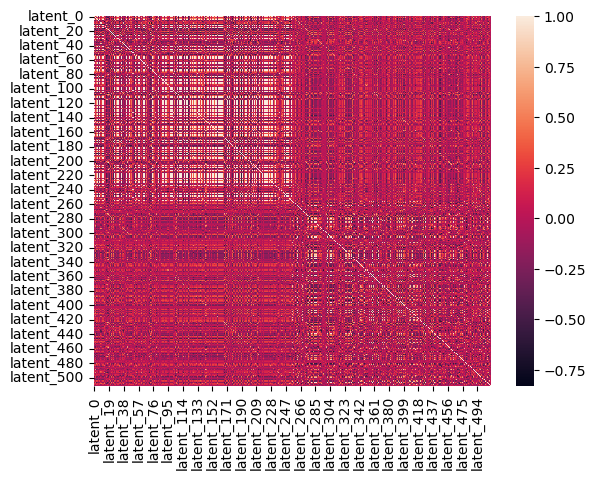

In [14]:
sns.heatmap(latent_feats.corr()) # correlation heatmap for all the latent features.

## The above heatmap shows that some of the features are highly corrleated, this signifies some redundancy in these features,and many features have very less/no correlation.

#### The section below prepares an EDA report for all the features in one go , using sweetviz, these features are abstract, but still it makes sense to explore there distribution.


#### I am also calculating feature importances (for latent_features and phenotyopes) using ANOVA f-scores w.r.t a particular target, to see how impoertant phneotypes are for prediction.


#### The report is saved as HTML file `eda_latent_feats.html`

In [90]:
import sweetviz as sv
eda_report = sv.analyze(latent_feats_phenotypes,pairwise_analysis="off")
#display the report
eda_report.show_html('eda_latent_feats.html') #

                                             |                                             | [  0%]   00:00 ->…

Report eda_latent_feats.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [45]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)


latent_feats_phenotypes = clean_dataset(latent_feats_phenotypes)

                                      
#cleaning latent_features+phenotypes dataframe as it has infinity values some
                                      

In [48]:
# feature importance scores of latent features using ANOVA

# Replace NaN values with the mean of the column
#latent_feats_phenotypes = latent_feats_phenotypes.fillna(latent_feats_phenotypes.mean())

f_scores, p_values = f_classif(latent_feats_phenotypes[[c for c in latent_feats_phenotypes if not 'target_' in c]], latent_feats_phenotypes["target_0"]) # with only target_0 as response variable

f_scores2, p_values2 = f_classif(latent_feats_phenotypes[[c for c in latent_feats_phenotypes if not 'target_' in c]], latent_feats_phenotypes["target_1"]) # with all targets as response variable

In [52]:
latent_feats_phenotypes[[c for c in latent_feats_phenotypes if not 'target_' in c]].shape

(9987, 516)

Text(0.5, 0.98, 'F score (ANOVA) based feature importance w.r.t a particular target')

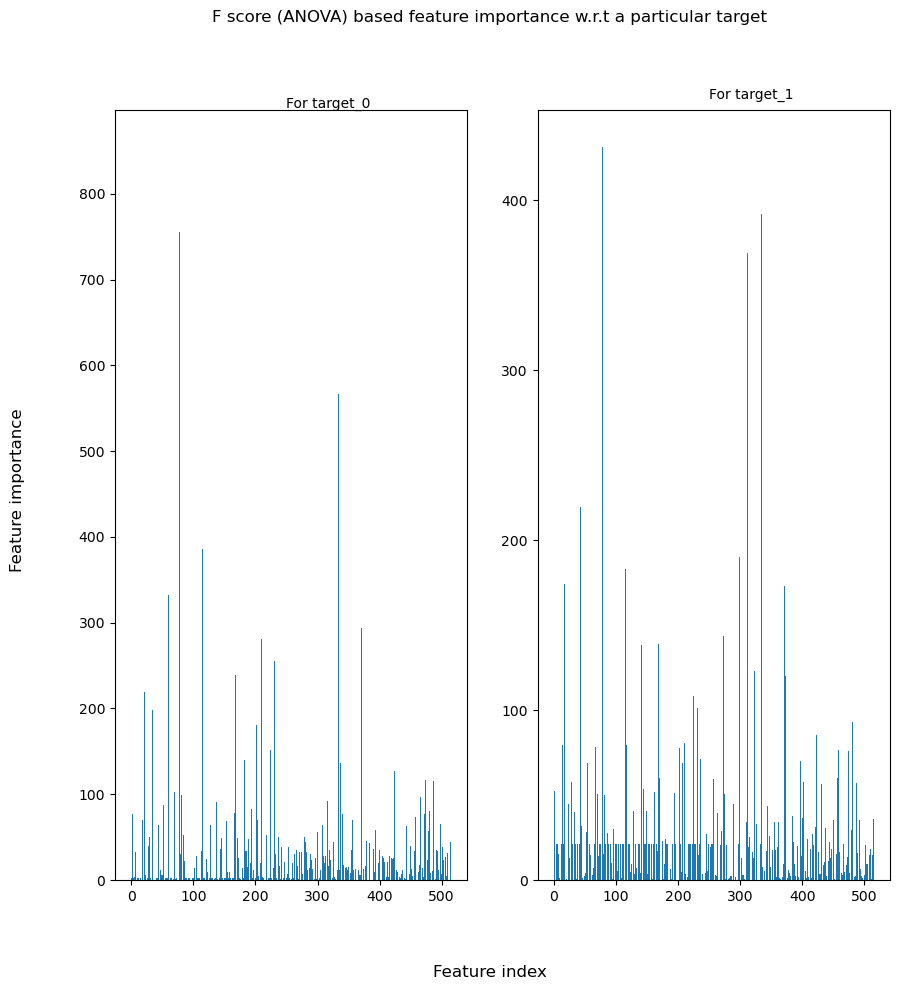

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
#plt.xlabel("Feature Index")
#plt.ylabel("Feature importance")
axes[0].bar(np.arange(516), f_scores)
axes[1].bar(np.arange(516), f_scores2)
axes[0].text(250,900,"For target_0")
axes[1].text(250,460,"For target_1")
#plt.bar(np.arange(512), f_scores)
#plt.xlabel("Feature Index")
#plt.ylabel("Feature importance")

fig.supxlabel('Feature index')
fig.supylabel('Feature importance')
fig.suptitle("F score (ANOVA) based feature importance w.r.t a particular target")

### Based on ANOVA f_scores, phenotypes don't seem to have too much importance, atleast as compared to other latent_features, but these could be used as covariates to control some of the bias in the samples.

In [16]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50)  #PCA to see how many components can actually define the variance
#fit PCA model to data
pca_fit = pca.fit(latent_feats)


### Almost, 20-25 Prinicpal componets explain most of the variance, so these can also be used as input, instead of all the 512 latent features

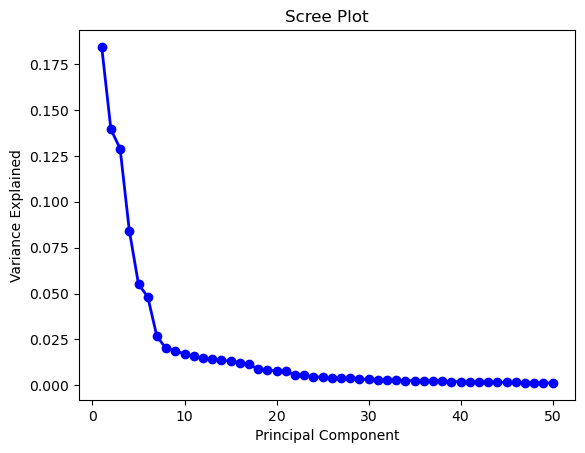

In [17]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Since Target_3 is a continous varaible, I performed linear regression on it and evaluated it using R2 and Mean absolute error, I also performed Lasso regression , since it regularizes the model and also removes unnecessary features by zeroing them out. Lasso is performed in K-fold cross validation paradigm

In [62]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn.model_selection import * 


# load the dataset



latent_df["target_3"].replace([np.inf, -np.inf], np.nan, inplace=True)
latent_df["target_3"].fillna(latent_df["target_3"].mean(), inplace=True)

X,y =  np.array(latent_feats), np.array(latent_df["target_3"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train,y_train)

train_r2 = reg.score(X_train,y_train)
test_r2 = reg.score(X_test,y_test)
y_pred = reg.predict(X_test)

mse = mean_absolute_error(y_pred,y_test)
print("R2 score for insample data is {r1} and for outsample data is {r2} and mae is {m}".format(r1=train_r2 , r2 = test_r2, m = mse))


model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores = abs(scores)


print("Mean R2 score for Lasso with for K-folds is {r22} and mae is {mae2}".format(r22=np.mean(r2) , mae2 = np.mean(scores)))

R2 score for insample data is 0.8504497889621223 and for outsample data is 0.8148188951760802 and mae is 52.49683185031301
Mean R2 score for Lasso with for K-folds is 0.8032276323930438 and mae is 52.31385714747689


### Performing regularization with L1-norm (Lasso) didn't make too much difference in the mean absolute error(calculated as mean of K-folds). Performing Polynomial regression and scaling the features to a power would helpful.

### Now,Target_0,Target_1 and Target_2 are discrete variables, we need to build a classifier for them, if we want to get all the targets in one go, this is essentially multi-target classification (not multi-class !). This can also be viewed as a Multi-label classification where each label (target) is mutually non-exclusive. 

#### There are other ways like building a label powerset, etc. to predict all the targets using a single model (Non-DL model). I have used a XgBoost classifier and wrapped it around a MultiOutputClassifier object to build mult-target classification pipeline, different estimator for each target.


#### I have used XgBoost because it uses gradient boosting and is known to outperform other models for tabular data. Other simpler models like KNN, RandomForest are also worth testing out.
#### The function train_xgboost:
  * Can take both, multiple targets and a single target for training the model(s).
  * Include_pheno parameter asks if you want to include phenotypes as predictors.
  * It also runs GridSearchCV to find the best set of hyperparameters.
  * If "find_best_model" is True, then it finds the best set of parameters, otherwise it takes a specfied set of    parameters.
  * It also makes a "Shap" explainer object to find shapley values for the features, to get a more explainable model. (Currently its only w.r.t Target_0).

In [65]:
# classification 

from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import shap
from sklearn.model_selection import train_test_split


def train_xgboost(responses, include_pheno=False, find_best_model=True):
    if include_pheno == True:  # include phenotypes, if true 
        X = np.array(latent_df[[c for c in latent_df if not 'target_' in c]].drop(["sample_id","phenotype_4"],1))
        
    else:
        X = np.array(latent_feats)
        
    y = np.array(latent_df[responses])
    #print(y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    model = XGBClassifier()
    
    if type(responses) == list:
        
        model = MultiOutputClassifier(model)  ## if multiple targets, wrap it around MultiOutputClassifier to build different models
  
    
    if find_best_model:
        param_grid = {
        'estimator__n_estimators': [50,100],
        'estimator__max_depth': [3,4,5],
        'estimator__learning_rate': [0.01,0.1]      
    }
    else:
         param_grid = {
        'estimator__n_estimators': [50],
        'estimator__max_depth': [5],
        'estimator__learning_rate': [0.1]      
    }
    

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')  # Find best set of parameters by searching the parameter space.
    #explainer = shap.Explainer(grid_search, X_train)
    grid_search.fit(X_train,y_train)
    
    
    best_params = grid_search.best_params_ 

    best_score = grid_search.best_score_ # best score based on GridSearch (averaged over targets).
    
    explainer_target_0 = shap.Explainer(grid_search.best_estimator_.estimators_[0], X_train) # Shap explainer object.
     
    return grid_search, best_score, best_params, X_test, y_test,explainer_target_0

    
    
    
    
    
    
    

In [67]:
search_object , best_score, best_params, X_test,y_test,explainer_target_0 = train_xgboost(["target_0","target_1","target_2"],find_best_model=False)

In [68]:

best_model = search_object.best_estimator_

In [69]:
best_score

0.9321249999999999

In [70]:
predictions = best_model.predict(X_test)

Target 0 accuracy: 0.992
Target 1 accuracy: 0.968
Target 2 accuracy: 0.966


Text(0.5, 1.0, 'Accuracies for different targets')

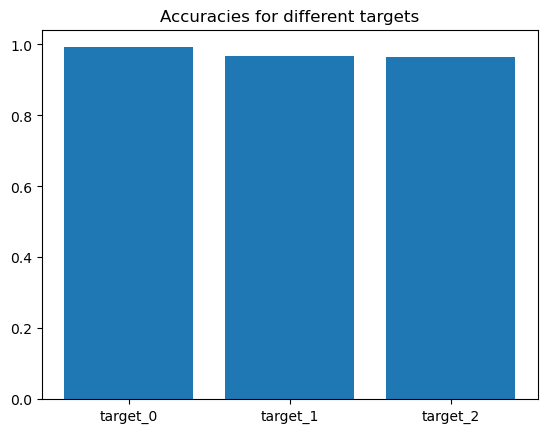

In [74]:
accuracies = []
for i in range(y_test.shape[1]):
    acc = accuracy_score(y_test[:,i], predictions[:,i])
    accuracies.append(acc)
    print("Target {} accuracy: {}".format(i, acc))
    
    
plt.bar(["target_0" ,"target_1" , "target_2" ], accuracies)
plt.title("Accuracies for different targets")

### ROC curves for different targets, I have plotted it in the same plot (each curve is for a different target, not class !)

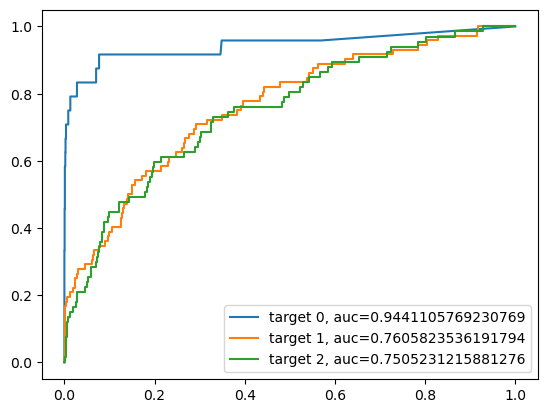

In [192]:

y_true = y_test
y_probas = best_model.predict_proba(X_test)
fpr1, tpr1, _ = roc_curve(y_true[:,0],  y_probas[0][:,1])
auc1 = roc_auc_score(y_true[:,0], y_probas[0][:,1])
fpr2, tpr2, _ = roc_curve(y_true[:,1],  y_probas[1][:,1])
auc2 = roc_auc_score(y_true[:,1], y_probas[1][:,1])
fpr3, tpr3, _ = roc_curve(y_true[:,2],  y_probas[2][:,1])
auc3 = roc_auc_score(y_true[:,2], y_probas[2][:,1])
plt.plot(fpr1,tpr1,label="target 0, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="target 1, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="target 2, auc="+str(auc3))
plt.legend(loc=4)
plt.show()
#skplt.metrics.plot_roc_curve(y_true[:,0], y_probas[:,0])
#plt.show()


## How do things change by including phenotypes as predictors (covariates)? 

In [75]:
search_object_with_pheno , best_score_with_pheno, best_params_pheno, X_test_pheno,y_test_pheno,explainer = train_xgboost(["target_0","target_0","target_1"],find_best_model=False,include_pheno=True)


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [76]:
best_model_pheno = search_object_with_pheno.best_estimator_

In [77]:
best_score_with_pheno

0.9626249999999998

In [79]:
predictions_pheno = best_model_pheno.predict(X_test_pheno)

Target 0 accuracy: 0.9925
Target 1 accuracy: 0.9925
Target 2 accuracy: 0.968


Text(0.5, 1.0, 'Accuracies for different targets')

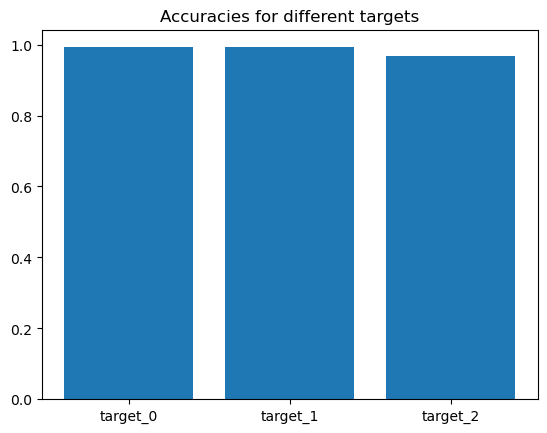

In [80]:
accuracies_pheno = []
for i in range(y_test.shape[1]):
    acc = accuracy_score(y_test_pheno[:,i], predictions_pheno[:,i])
    accuracies_pheno.append(acc)
    print("Target {} accuracy: {}".format(i, acc))
    
    
plt.bar(["target_0" ,"target_1" , "target_2" ], accuracies_pheno)
plt.title("Accuracies for different targets")

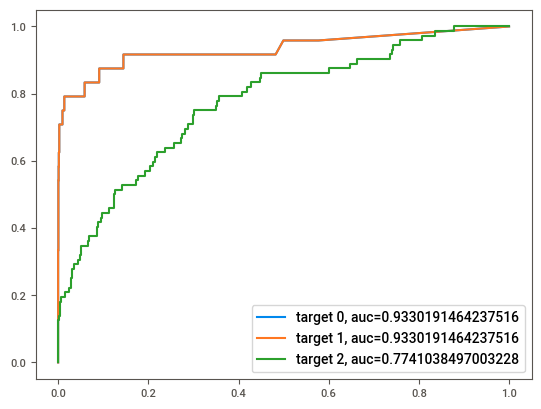

In [95]:
y_true = y_test_pheno
y_probas = best_model_pheno.predict_proba(X_test_pheno)
fpr1, tpr1, _ = roc_curve(y_true[:,0],  y_probas[0][:,1])
auc1 = roc_auc_score(y_true[:,0], y_probas[0][:,1])
fpr2, tpr2, _ = roc_curve(y_true[:,1],  y_probas[1][:,1])
auc2 = roc_auc_score(y_true[:,1], y_probas[1][:,1])
fpr3, tpr3, _ = roc_curve(y_true[:,2],  y_probas[2][:,1])
auc3 = roc_auc_score(y_true[:,2], y_probas[2][:,1])
plt.plot(fpr1,tpr1,label="target 0, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="target 1, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="target 2, auc="+str(auc3))
plt.legend(loc=4)
plt.show()
#skplt.metrics.plot_roc_curve(y_true[:,0], y_probas[:,0])
#plt.show()

### Shapley values showing what were the features inlcuding phenotypes. that were highly important in making a particular prediction by the model. This is only for Target_0.

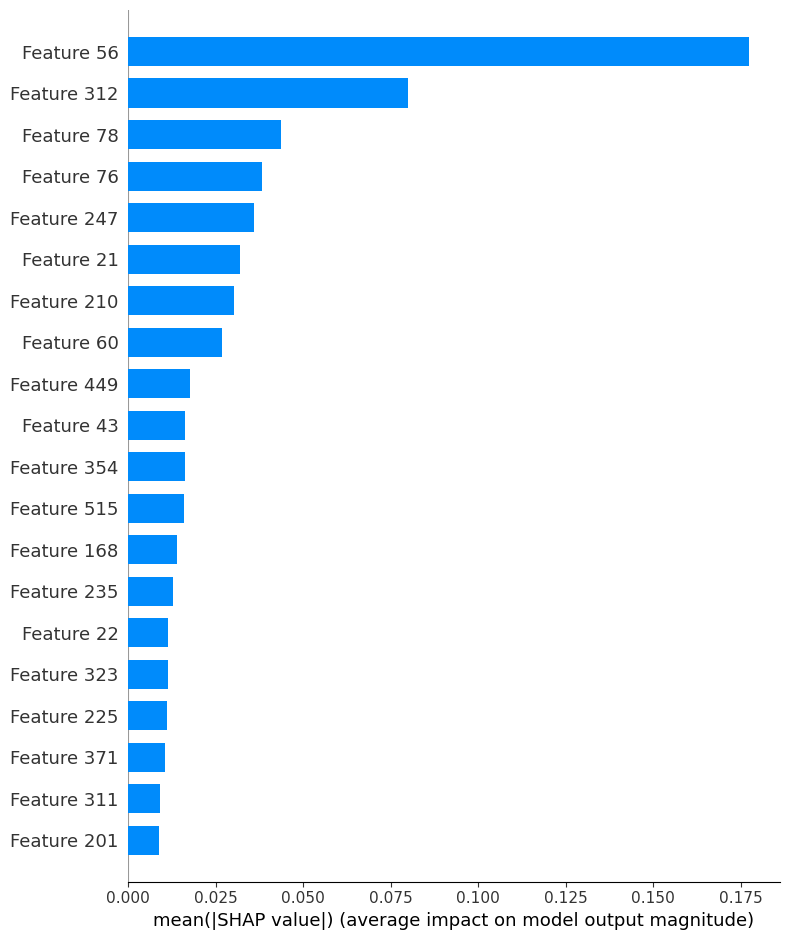

In [81]:
shap_values = explainer(X_test_pheno)

# summarize theShapley values for each input variable
shap.summary_plot(shap_values, X_test_pheno, plot_type="bar")


### In the last section, I have built a Neural network architecture for predicting all the targets (mult-target prediction), for both classification and regression. 

#### The network is built in a way that the initial layers are common and extract abstractions and then the model diverges to specific layers for predicting different targets in an isolated sense. For example, to predict "target_3", the correponding layer has a linear activation function.

#### The data is standardised and one-hot encoded (for classification) and has 3 common layers for all the targets.

#### 20% of the data is used for validation, while training the model


#### Binary crossentropy is used as a loss for Classification and MSE is used for regression.

In [83]:
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Concatenate

from sklearn.preprocessing import StandardScaler,OneHotEncoder


def hot_encoder(v):
    onehotencoder = OneHotEncoder(categories='auto')
    return onehotencoder.fit_transform(np.array(v).reshape(-1,1)).toarray()

def train_neural_network(epochs, model_name, include_pheno=False):
    if include_pheno == True:
        X = np.array(latent_df[[c for c in latent_df if not 'target_' in c]].drop(["sample_id","phenotype_4"],1))
    else:
        X = np.array(latent_feats)
        
        
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
        
    y = latent_df[["target_0","target_1","target_2","target_3"]]
    
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    y1,y2,y3,y4 = hot_encoder(y_train["target_0"]),hot_encoder(y_train["target_1"]),hot_encoder(y_train["target_2"]),y_train["target_3"]
   
    y1_val,y2_val,y3_val,y4_val = hot_encoder(y_val["target_0"]),hot_encoder(y_val["target_1"]),hot_encoder(y_val["target_2"]),y_val["target_3"]
    
    
        
    input_layer = Input(shape=(X.shape[1],))
    hidden_layer1 = Dense(128, activation='relu')(input_layer)   ## Common layers for all targets.
    hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(32, activation='relu')(hidden_layer2)

    # target_0 
    target_0_output = Dense(2, activation='sigmoid', name='class1')(hidden_layer3)  ## This layer is only connected to hidden_layer3 and is used for target_0
    
    # target_1
    target_1_output = Dense(2, activation='sigmoid', name='class2')(hidden_layer3) ## This layer is only connected to hidden_layer3 and is used for target_1
    
    # target_2 
    target_2_output = Dense(2, activation='sigmoid', name='class3')(hidden_layer3) ## This layer is only connected to hidden_layer3 and is used for target_2

    # regression output
    regression_output = Dense(1, activation='linear', name='reg')(hidden_layer3) ## This regression layer is only connected to hidden_layer3 and is used for target_3

    # concatenate outputs
    #output_layer = Concatenate()([target_0_output,target_1_output,target_2_output, regression_output])

    # define the model
    model = Model(inputs=input_layer, outputs=[target_0_output,target_1_output,target_2_output, regression_output])
    print(model.summary())

    # compile the model
    model.compile(loss={'class1': 'binary_crossentropy', 'class2': 'binary_crossentropy','class3': 'binary_crossentropy', 'reg': 'mean_squared_error'}, 
                  optimizer='adam', metrics={"class1": 'accuracy', "class2": 'accuracy',"class3": 'accuracy' ,"reg": 'mse'})

    # fit the model to the data
    model.fit(X_train, {'class1': y1, 'class2': y2, 'class3': y3, 'reg': y4}, epochs=epochs, batch_size=32,validation_data=(X_val,{'class1': y1_val, 'class2': y2_val, 'class3': y3_val, 'reg': y4_val}))
    model.save("{m}.h5".format(m=model_name))
              
              
    return model,X_val





In [84]:
trained_model,xval = train_neural_network(50,"intial_model")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          65664       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

In [85]:
predictions_nn = trained_model.predict(xval)
#xval[0].shape

63/63 [==============================] - 0s 2ms/step


### Validation accuracies:
#### Target_0 = 0.9900
#### Target_1 = 0.9660
#### Target_2 = 0.9680

### Validation MSE:
#### Target_2 = 5915.59

### Final thoughts and guesses.

* ####  The latent features most probably came out of a latent embedding from an Autoencoder, the actual data might be very high dimensional, it could be the ECG data where all the 5000 timesteps over all the channels were considered as features (one patient as a sample) and were compressed to a latent space for downstream analaysis.


* #### Inclusion of Phenotypes did increase the performance of the models, but the difference was negligible, they can be used as co-variates for controlling the bias due to Sex, Age, Height, Resting heart rate, etc. From the range and domain of data, it seems like *Phenotype_0 is age and Phenotype_2 is Sex*.


 * #### The different targets could be , whether the patient had atrial fibrillation or not, whether the patient survived, etc.
